In [66]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

## Problem statement

### Dataset


**Attributes of the dataset:** Thera Bank Personal Loan data
**Train the KNN algorithm,Naive Bayes and Logistic regression to be able to distinguish the species from one another given the measurements of the 3 features.**

## Step 1

Import the data set and print 10 random rows from the data set

In [67]:
# Importing necessary data libraries
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns

In [68]:
bank_df = pd.read_csv("bank.csv")

In [69]:
bank_df.sample(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4098,4099,27,3,75,90032,4,0.0,1,0,0,0,0,0,0
3240,3241,62,36,63,93407,1,1.6,1,118,0,0,0,1,0
260,261,51,27,58,92407,1,0.0,1,0,0,0,0,0,1
4609,4610,54,28,80,95006,4,2.6,3,143,0,0,0,0,0
2025,2026,47,20,79,94720,3,2.0,2,185,0,1,0,0,0
4827,4828,30,6,181,91203,1,4.3,1,230,0,0,0,1,0
2861,2862,42,18,60,92677,4,0.2,3,151,0,0,0,0,1
3228,3229,27,2,45,94305,2,1.7,2,0,0,0,0,0,1
23,24,44,18,43,91320,2,0.7,1,163,0,1,0,0,0
2519,2520,60,36,10,92121,2,1.0,1,0,0,0,0,1,1


## Data Pre-processing

## Step 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [70]:
bank_df.shape

(5000, 14)

In [71]:
bank_df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [72]:
bank_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [73]:
#Replacing with median
bank_df = bank_df.replace('?', np.nan)
bank_df=bank_df.fillna(bank_df.median())
bank_df.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


## Step 3

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [74]:
#Removing ID column as it doesn't have any impact on data set
bank_df.drop('ID', axis=1, inplace=True)

In [75]:
bank_df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [76]:
#Applying Z score to explore the data unitless
bank_data_z = bank_df.apply(zscore)

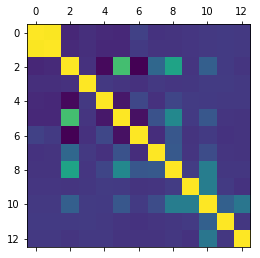

In [77]:
import matplotlib.pyplot as plt
plt.matshow(bank_data_z.corr())

In [78]:
bank_data_z.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


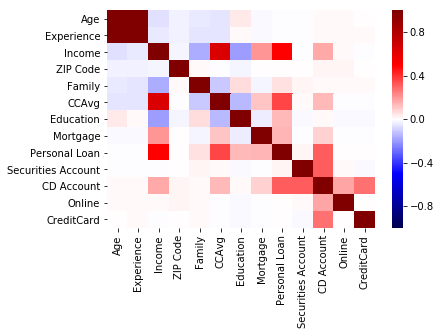

In [124]:
sns.heatmap(bank_data_z.corr(),vmin=-1,vmax=1,cmap='seismic')

In [14]:
# Personal loan as a target variable has decent level of correlation with Income,CCAvg and CD Account.
#Interpretting that person who has has high income and paying decent credit average or with deposit accounts have more chances of getting personal loan.

In [17]:
bank_data_z.var()

Age                   1.0002
Experience            1.0002
Income                1.0002
ZIP Code              1.0002
Family                1.0002
CCAvg                 1.0002
Education             1.0002
Mortgage              1.0002
Personal Loan         1.0002
Securities Account    1.0002
CD Account            1.0002
Online                1.0002
CreditCard            1.0002
dtype: float64

## Step 4

*Plot the scatter matrix for all features with target variable.*

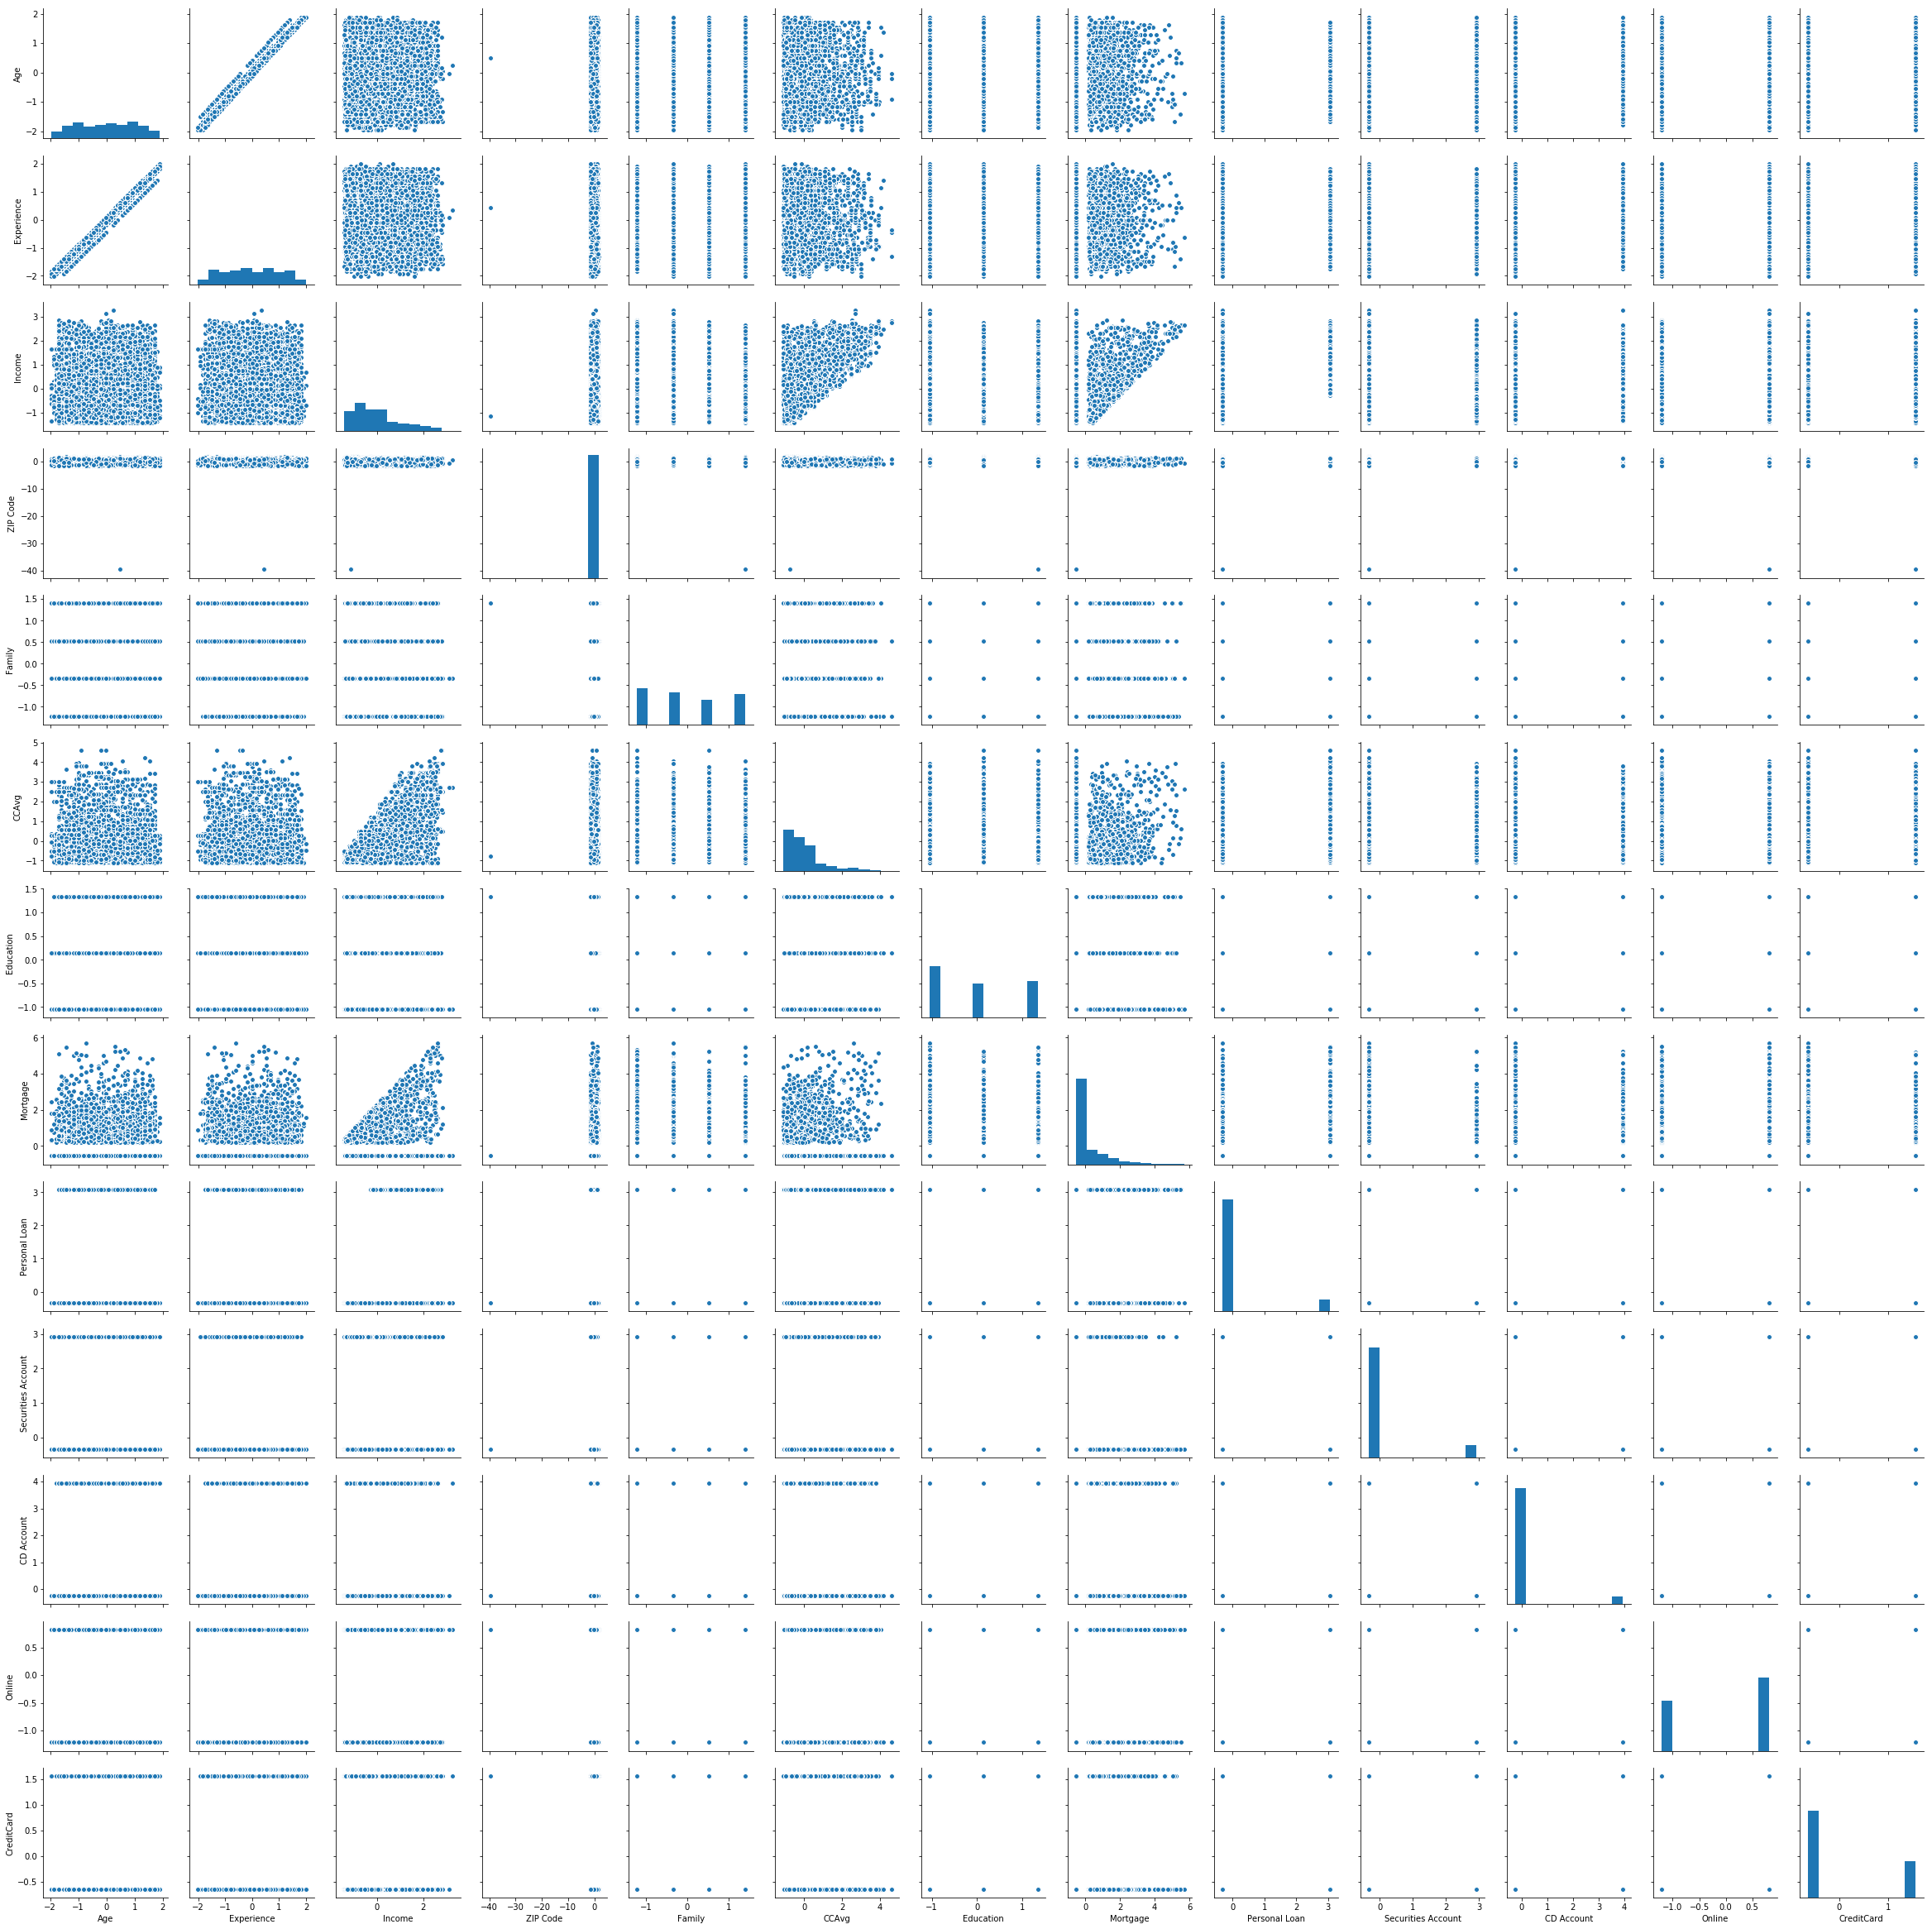

In [121]:
sns.pairplot(bank_data_z)

## Split the dataset into training and test sets

## Step 5

*Split the dataset into training and test sets with 80-20 ratio.*

In [79]:
from sklearn.model_selection import train_test_split

array = bank_data_z.values
bank_feature_df = bank_data_z.drop(labels= "Personal Loan" , axis = 1)
bank_labels = bank_data_z["Personal Loan"]
X = np.array(bank_feature_df)
Y = np.array(bank_labels)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [80]:
Y_train=Y_train.astype(int)
Y_test=Y_test.astype(int)
X_train=X_train.astype(int)
X_test=X_test.astype(int)
#converting y test and train variables to int

## Step 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [106]:
NNH = KNeighborsClassifier(n_neighbors=5, weights = 'uniform', metric='euclidean')

In [107]:
from sklearn.metrics import accuracy_score

NNH.fit(X_train, Y_train)
predicted_labels = NNH.predict(X_test)

accuracy_score(Y_test, predicted_labels)
#k=3;accuracy=94.5
#k=5;accuracy=94.5
#k=9; accuracy=97.5

0.945

## Step 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

In [83]:
!pip install -U sklearn

Requirement already up-to-date: sklearn in c:\users\sahanaa_m\anaconda3\lib\site-packages (0.0)
Requirement not upgraded as not directly required: scikit-learn in c:\users\sahanaa_m\anaconda3\lib\site-packages (from sklearn) (0.20.0)
Requirement not upgraded as not directly required: scipy>=0.13.3 in c:\users\sahanaa_m\anaconda3\lib\site-packages (from scikit-learn->sklearn) (1.1.0)
Requirement not upgraded as not directly required: numpy>=1.8.2 in c:\users\sahanaa_m\anaconda3\lib\site-packages (from scikit-learn->sklearn) (1.14.3)


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [108]:
from sklearn.model_selection import GridSearchCV

k = np.arange(1,19)
knn = KNeighborsClassifier()
parameters = {'n_neighbors': k}
GS = GridSearchCV(knn,parameters,cv=10)

In [109]:
GS.fit(X_train,Y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [110]:
cv_labels=GS.predict(X_test)

In [111]:
acc=accuracy_score(Y_test, cv_labels)
print('Accuracy' ,acc)

Accuracy 0.945


In [114]:
metrics.confusion_matrix(expected,predicted)

array([[806,  94],
       [ 38,  62]], dtype=int64)

In [112]:
print(metrics.classification_report(Y_test, cv_labels))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       900
           3       0.94      0.48      0.64       100

   micro avg       0.94      0.94      0.94      1000
   macro avg       0.94      0.74      0.80      1000
weighted avg       0.94      0.94      0.94      1000



In [113]:
mse=1-acc
mse

0.05500000000000005

# Naive Bayes 

In [90]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [91]:
from sklearn.naive_bayes import GaussianNB
#fitting model
model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [92]:
#Evaluating model
# make predictions
from sklearn import metrics

expected = Y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print('Confusion matrix \n',metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       900
           3       0.40      0.62      0.48       100

   micro avg       0.87      0.87      0.87      1000
   macro avg       0.68      0.76      0.70      1000
weighted avg       0.90      0.87      0.88      1000

Confusion matrix 
 [[806  94]
 [ 38  62]]


In [93]:
accuracy_score(expected, predicted)

0.868

# SVM


In [95]:
#splitting data
#we can use same splitted data which used for knn

In [96]:
#traning and fitting model
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [97]:
#prediction of trained model
pred=model.predict(X_test)

In [98]:
#model evaluation
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test,pred))

[[899   1]
 [ 37  63]]


In [99]:
#classification report
print(classification_report(Y_test, pred))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       900
           3       0.98      0.63      0.77       100

   micro avg       0.96      0.96      0.96      1000
   macro avg       0.97      0.81      0.87      1000
weighted avg       0.96      0.96      0.96      1000



In [100]:
accuracy_score(Y_test, pred)

0.962

### Logistic Regression
Find Correlation among all variables and give your insights 

In [101]:
#traning and fitting model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [102]:
#prediction of trained model
pred=model.predict(X_test)

In [103]:
#model evaluation
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test,pred))

[[881  19]
 [ 47  53]]


In [104]:
#classification report
print(classification_report(Y_test, pred))


              precision    recall  f1-score   support

           0       0.95      0.98      0.96       900
           3       0.74      0.53      0.62       100

   micro avg       0.93      0.93      0.93      1000
   macro avg       0.84      0.75      0.79      1000
weighted avg       0.93      0.93      0.93      1000



In [105]:
accuracy_score(Y_test, pred)

0.934

In [ ]:
#Accuracy and classification report summary
KNN & KNN with cross validation 
Accuracy 94.5
Precision  0.95 , 0.94

Naive bayes 
Accuracy 0.868
Precision 0.95 0.4

SVM 
Accuracy 0.962
Precision 0.96 and 0.98

Logistic regression
Accuracy 0.93
Precision 0.95 0.74

SVM is best classifier for this data set with more accuracy

In [ ]:
#Based on confusion matrix
KNN
[[806,  94],
 [ 38,  62]]
  
Naive Bayes
[[806  94]
 [ 38  62]]
 
SVM
[[899   1]
 [ 37  63]]
 
Logistic regression 
[[881  19]
 [ 47  53]]

Comparing the above classifiers, SVM has the least true negatives and false postivies.

Therefore, SVM is suitable classifer.